In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from imp import reload
import numpy as np

In [3]:
#  Defining our datasets to variables
mouse = pd.read_csv('mouse_data.csv')
roster = pd.read_csv('owl_roster.csv')
settings = pd.read_csv('player_settings.csv')
datalist = [mouse, roster, settings]

In [5]:
#  Checking for null values in the data
for i in datalist:
    print(i.isnull().sum())

Model                0
Size                 0
Length               0
GripWidth            0
Weight               0
WeightToSizeRatio    0
dtype: int64
ID               0
Team             0
Status           0
Roles            0
HaveSettings     0
Hero             0
TwitchStream    29
dtype: int64
Player                     0
IsProfessional             0
Role                       0
Hero                       0
MouseModel                 0
MouseWeight                0
MouseWeightToSizeRatio     0
DPI                        0
Sensitivity                0
eDPI                       0
cmPer360                   0
TwitchStream              10
dtype: int64


As we can see we the only null values we have are in the 'TwitchStream' category which we will be dropping anyways, these null values are most likely pro players that don't stream on Twitch.tv

Now let's see what our data looks like within our datasets this code will output the first 5 rows of each data set in order of our list (mouse, roster, and settings) and will be seperated by 2 rows of 100 '#' symbols

In [6]:
for i in datalist:
    print(i.head())
    print('\n Number of rows in this dataframe:')
    print(len(i))
    print(('\n'+'#'*100 + '\n')*2)

                   Model Size  Length  GripWidth  Weight  WeightToSizeRatio
0    Cooler Master MM520    M   11.60       7.50     102               1.17
1    Cooler Master MM710    S   11.50       5.45      54               0.86
2    Cooler Master MM720    S   10.50       7.10      50               0.67
3         Corsair Glaive   XL   12.50       6.46     120               1.49
4  Corsair M65 RGB Elite    M   11.56       6.50      96               1.28

 Number of rows in this dataframe:
99

####################################################################################################

####################################################################################################

          ID                 Team  Status    Roles  HaveSettings   Hero  \
0      Alarm  Philadelphia Fusion  Active  Support          True    Ana   
1      Ameng      Chengdu Hunters  Active     Tank          True  Orisa   
2      Anamo        Seoul Dynasty  Active  Support          True  Mercy   


The data is fairly straightforward, we have our mouse model name and size specs. in the 'mouse' dataset. The 'roster' data set has the names of players, some other info and most importantly what mouse they use. The 'settings' dataset has some info from the other datasets but it contains our actual mouse settings for each player. Let's proceed to cleaning the data up a bit.

Since we have a 'HaveSettings' column in the 'roster' dataframe, as well as a 'IsProfessional' column in the 'settings' dataframe we can remove any payers with false values in these columns just in case there are some players who don't have their settings available or any amateur players.


In [7]:
#  Dropping the 'TwitchStream' col. from the 'roster dataset'
roster.drop(['TwitchStream'], axis=1, inplace=True)
#  Removing any players that may not have their settings available
roster.drop(roster[roster['HaveSettings'] == False].index, inplace=True)
#  Dropping the now obsolete 'HaveSettings' column
roster.drop(['HaveSettings'], axis=1, inplace=True)
#  Removing any players that may not be pro players
settings.drop(settings[settings['IsProfessional'] == False].index, inplace=True)
#  Dropping non essential columns in 'settings' dataframe
settings.drop(['IsProfessional', 'cmPer360', 'TwitchStream'], axis=1, inplace=True)

In [8]:
#  Now that we've cleaned the data up let's take another look at it
for i in datalist:
    print(i.head())
    print('\n Number of rows in this dataframe:')
    print(len(i))
    print(('\n'+'#'*100 + '\n')*2)

                   Model Size  Length  GripWidth  Weight  WeightToSizeRatio
0    Cooler Master MM520    M   11.60       7.50     102               1.17
1    Cooler Master MM710    S   11.50       5.45      54               0.86
2    Cooler Master MM720    S   10.50       7.10      50               0.67
3         Corsair Glaive   XL   12.50       6.46     120               1.49
4  Corsair M65 RGB Elite    M   11.56       6.50      96               1.28

 Number of rows in this dataframe:
99

####################################################################################################

####################################################################################################

          ID                 Team  Status    Roles   Hero
0      Alarm  Philadelphia Fusion  Active  Support    Ana
1      Ameng      Chengdu Hunters  Active     Tank  Orisa
2      Anamo        Seoul Dynasty  Active  Support  Mercy
3  ANSOONJAE      Toronto Defiant  Active  Support  Lúcio
4  Archite

Let's take a look at some of the mouse size and weight data. Keep in mind the our measurments are 'cm' and our weight is in 'grams'

In [9]:
#  Creating a function to show the top 5 value counts for each of our columns
def funkytown(col, title):
    print('\n' + title + '\n')
    print(mouse[col].value_counts().head())
    print('#' * 50)
funkytown('Size', 'Size')
funkytown('GripWidth', 'Grip Width')
funkytown('Weight', 'Weight')
funkytown('WeightToSizeRatio', 'Weight To Size Ratio')


Size

M     38
L     29
S     19
XL     9
XS     4
Name: Size, dtype: int64
##################################################

Grip Width

6.10    12
5.60     7
6.00     6
5.67     6
5.90     5
Name: GripWidth, dtype: int64
##################################################

Weight

90    5
87    5
85    4
68    4
96    4
Name: Weight, dtype: int64
##################################################

Weight To Size Ratio

1.17    7
1.39    4
1.28    4
1.26    3
1.18    3
Name: WeightToSizeRatio, dtype: int64
##################################################


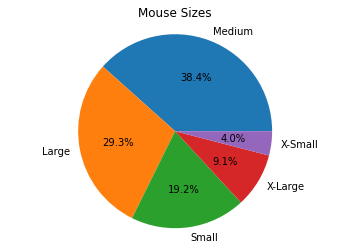

In [10]:
#  Size data visualization
size_data = [38, 29, 19, 9, 4]
size_labels = 'Medium', 'Large', 'Small', 'X-Large', 'X-Small'
plt.pie(size_data,labels=size_labels,autopct='%1.1f%%')
plt.title('Mouse Sizes')
plt.axis('equal')
plt.show()

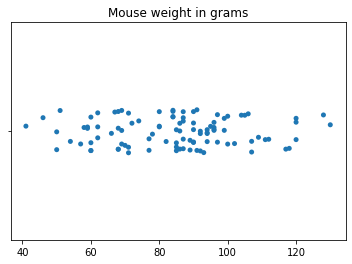

In [11]:
weightplot = sns.stripplot(x = mouse['Weight'])
weightplot.set(xlabel='', title='Mouse weight in grams')
plt.show()


With both mouse size and weight we see some fairly evenly distributed data, Medium being the most common size and most of the mouse weights are pretty centered at the 70-100 gram range.

We will now move on to the roster dataframe in order to find the most popular hero in the dataframe as well as the most popular role.

In [12]:
#  Displaying the top 5 most common heros in the column
roster['Hero'].value_counts().head()

Zenyatta    18
Lúcio       16
Tracer      14
Genji       14
D.Va        13
Name: Hero, dtype: int64

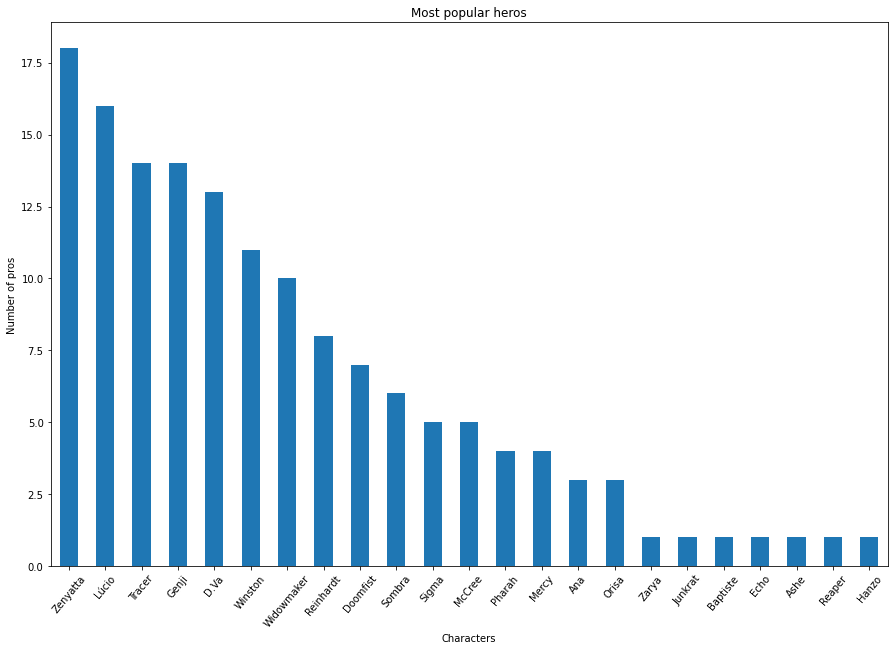

In [13]:
#  Re-loading 'plt' to prevent errors
reload(plt)
#  Visualizing our hero popularity
plt.figure(figsize=(15,10))
roster['Hero'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Characters')
plt.ylabel('Number of pros')
plt.title('Most popular heros')
plt.show()

Damage     64
Tank       42
Support    42
Name: Roles, dtype: int64


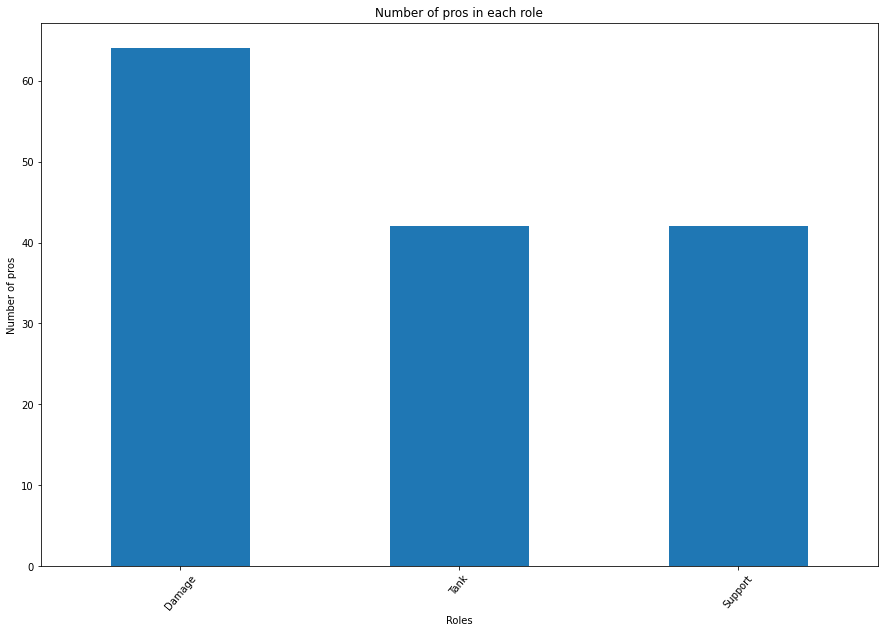

In [14]:
print(roster['Roles'].value_counts())
plt.figure(figsize=(15,10))
roster['Roles'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Roles')
plt.ylabel('Number of pros')
plt.title('Number of pros in each role')
plt.show()

We have 64 damage, 42 tank, and 42 support players. This spread makes sense considering that damage players have the most characters to choose from in the game with 17, while support and tank have 7 and 8 respectively.

Zenyatta, Lúcio, Tracer, Genji, and D.Va are our top 5 characters, our top 2 characters fall in the support role. It's most likely due to how strict the META(Most Effective Tactics Available) play for support heros in as high level play is coupled with the fact that supports have the least amount of characters to choose from. It's still interesting to see that over 80% of our support players play Zenyatta or Lucio. Damage is interesint as well because they have the largest selection pool yet 44% of our pros play either Tracer or Genji, these particular characters have a very high skill ceiling which might explain why some of the best players in the world focus on them so much as their play wont be effected as much as others during game changes/updates.

We'll now move on to the settings data to take a look at the most popular mouse sensitivites, we'll be focussing on eDPI as it is generally the standard since its a combination of your DPI and game sensitivty 

We'll check out the average eDPI for each role and character and then analyze

In [15]:
#  Dropping these columns of data that we've already used and are just clutter at this point
settings.drop(['MouseModel', 'MouseWeight', 'MouseWeightToSizeRatio'], axis=1, inplace=True)
#  Displaying the settings dataframe 
settings

,Player,Role,Hero,DPI,Sensitivity,eDPI
0,ameng,Tank,Orisa,800,6.00,4800
1,Guxue,Tank,Winston,1600,9.99,15984
2,Poko,Tank,D.Va,800,12.50,10000
3,HOTBA,Tank,D.Va,800,12.01,9608
4,Smurf,Tank,Winston,800,6.00,4800
...,...,...,...,...,...,...
143,Teru,Damage,Genji,1600,3.00,4800
144,Toyou,Tank,D.Va,800,4.30,3440
145,TTuba,Damage,Pharah,1000,5.10,5100
146,Valentine,Damage,Doomfist,800,8.00,6400


In [16]:
#  First were going to group the players by role into 3 different dataframes
#  We'll create 'tank', 'damage', and 'support'
tank = settings[settings['Role'] == 'Tank']
damage = settings[settings['Role'] == 'Damage']
support = settings[settings['Role'] == 'Support']

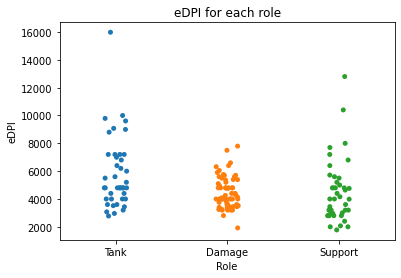

In [17]:
#  Let's visualize the eDPI for each of the roles(most pro players change their sensitivity depending on role or hero)
sns.stripplot(x=settings['Role'], y=settings['eDPI'])
plt.title('eDPI for each role')
plt.show()

In [18]:
#  as we can see we have some clear outliers so we will remove the top 1% and the bottom 1% of each of our new dataframes
#  Finding top and bottome 1% of each dataframe
tankhigh = tank.quantile(0.99)["eDPI"]
tanklow = tank.quantile(0.01)["eDPI"]

damagehigh = damage.quantile(0.99)["eDPI"]
damagelow = damage.quantile(0.01)["eDPI"]

supporthigh = support.quantile(0.99)["eDPI"]
supportlow = support.quantile(0.01)["eDPI"]

#  Removing top and bottom 1% of each dataframe
tank = tank[(tank["eDPI"] > tanklow) & (tank["eDPI"] < tankhigh)]
damage = damage[(damage["eDPI"] > damagelow) & (damage["eDPI"] < damagehigh)]
support = support[(support["eDPI"] > supportlow) & (support["eDPI"] < supporthigh)]

#  Assigning average eDPI to variables
tankmean = tank['eDPI'].mean()
damagemean = damage['eDPI'].mean()
supportmean = support['eDPI'].mean()


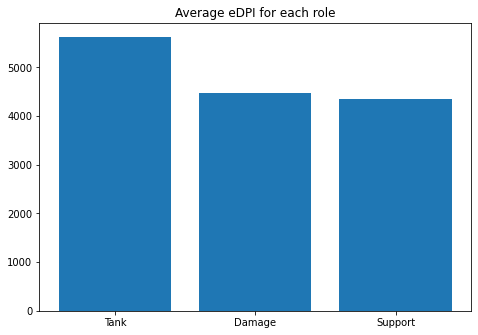

In [19]:
#  Plotting the average eDPI according to role
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
means = [tankmean, damagemean, supportmean]
bars = ['Tank', 'Damage', 'Support']
ax.bar(bars,means)
plt.title('Average eDPI for each role')
plt.show()

The tank players tend to have a higher eDPI, tanks need to have a high eDPI in order to do quick turns necessary for certain mechanics such as cancelling an enemy players ultimate ability.

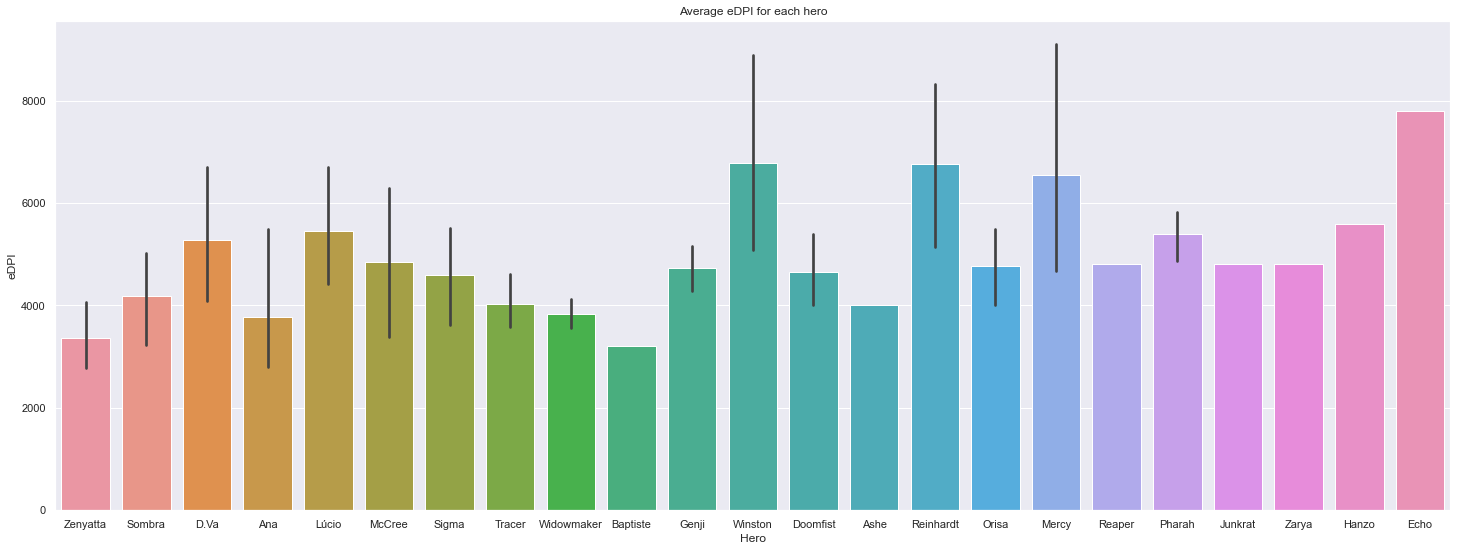

In [20]:
#  Finding the average eDPI according to each hero
averagebyhero = settings.groupby("Hero").mean()
#  Plotting eDPI for each hero
sns.set(rc={'figure.figsize':(25,9)})
sns.barplot(x='Hero', y='eDPI', data=settings.sort_values("eDPI"))
plt.title('Average eDPI for each hero')
plt.show()

As we can see, Echo(a damage hero) has the highest average eDPI amongst our pros. This is due to Echo being an incredibly mobile character who depends on sharp turns and flicks to fly across the map of the game. Mercy falls into a similar category as Echo since she can fly as well and her speed when flying is vital so that she doesn't get easily picked off by the enemy team. We can see that tanks hold the 2nd and 3rd highest average eDPI due to reasons mentioned previously about the need for fast turns and certain mechanics.

**Resources**


dataset: https://www.kaggle.com/yakiya51/pro-overwatch-player-settings



- https://www.kaggle.com/yakiya51/overwatch-professionals-mouse-sens-settings
      -This is an analysis done by the creator of the data set, I took alot of
      inspiration from this analysis and it definitely helped me improve

- Most of the information came from the help of one of my friends who is a masters ranked overwatch player, he wishes to remain anonymous but he was instrumental in interpretting the data